In [1]:
import pandas as pd
import numpy as np

#### 1. Data Preparation

Consider a single dimension (variable) X. Obtain N = 100 iid samples x1, x2, · · · of X uniformly randomly between 1 and 10, and then obtain the corresponding y values as the natural logarithm of x plus a Gaussian noise (mean 0, standard deviation 0.1), with different points having different amounts of noise. 

In [2]:
np.random.seed(44)
X = np.random.uniform(low=1,high=10,size=100)

In [3]:
# print X
X

array([8.51357934, 1.94316494, 7.70176434, 4.24450753, 4.23379754,
       6.48314543, 4.54401596, 4.68165349, 5.58912169, 7.39133194,
       9.64473603, 5.10958998, 4.84886369, 2.02117331, 2.96108982,
       9.61724862, 9.49015648, 8.93641853, 6.81769506, 2.92442331,
       6.73148812, 2.25231627, 5.12833663, 8.86476867, 3.32605275,
       6.98365988, 8.76406902, 2.33963257, 6.06654962, 2.43239737,
       2.55605434, 1.93620665, 2.82643834, 5.09670367, 8.15117425,
       9.91740413, 8.24515481, 4.39673865, 5.64163683, 1.53009029,
       7.39986118, 1.65257032, 8.94350424, 7.53452037, 8.50029591,
       7.39207615, 7.27686926, 9.37092523, 8.93505474, 1.85474785,
       5.10846776, 5.43451143, 1.98076154, 2.38361015, 9.8585563 ,
       3.44404138, 9.07436698, 2.47811181, 2.19122465, 3.85618062,
       3.76680303, 4.79849668, 3.97896752, 6.11267836, 1.85756195,
       8.18179736, 3.41790733, 9.20273422, 9.11569582, 1.1427202 ,
       8.68314021, 7.08045556, 1.33912263, 3.7805305 , 6.07824

In [4]:
# Gaussian noise (mean 0, standard deviation 0.1) with different points having different amounts of noise.
# Note: Guassian is nothing but normal distribution, therefore using numpy.random.normal gives 100 noises (size=100)
np.random.seed(44)
noise = np.random.normal(loc=0,scale=0.1,size=100)
noise

array([-7.50614717e-02,  1.31635732e-01,  1.24614003e-01, -1.60491574e-01,
       -1.46814368e-01, -1.71507046e-01,  1.85878369e-01,  8.75879763e-03,
       -5.23221964e-03,  5.55471637e-02, -9.63403694e-02, -1.80321465e-02,
       -1.18340916e-01,  6.05445921e-02, -9.51650553e-02,  3.60856060e-02,
        1.06061026e-01, -1.17152178e-02,  8.25664851e-02, -1.20981355e-01,
       -1.19050362e-01,  2.19871821e-02, -2.12919130e-02, -1.41149914e-01,
       -4.82981016e-02,  1.20176208e-01, -7.05803033e-02,  2.51813547e-03,
       -3.91128155e-02,  1.93139124e-02,  3.49290932e-02,  5.91188382e-02,
        5.20409870e-02,  8.25222389e-02,  4.26203507e-02,  1.95640026e-02,
       -5.14112178e-02, -3.07368882e-01, -3.95159070e-02, -7.95399184e-02,
       -7.03201512e-02, -1.73739268e-01,  7.50808258e-02, -1.86395314e-01,
        4.18510984e-02, -2.35333837e-02,  4.32107174e-02,  8.70291930e-02,
        2.00862219e-01,  1.37177091e-01,  1.05859789e-01,  1.44533756e-01,
        4.88232904e-03,  

In [5]:
y = list()
for x_i, noise_i in zip(X, noise):
    # natural logarithm of x is just np.log where as log10 is np.log10
    y_i = np.log(x_i) + noise_i
    y.append(y_i)
print(y)

[2.0666009861899353, 0.7959537882645583, 2.1660634399073024, 1.2851342262588346, 1.2962849860692705, 1.6976987519753934, 1.6996895628426043, 1.552410154718567, 1.7155899328729944, 2.05585511783081, 2.170071907656952, 1.6130870157888915, 1.460403471074548, 0.7642227814305482, 0.9903923290546297, 2.2996438236784384, 2.3563161274152136, 2.1784196792666766, 2.002087932282761, 0.952115946807709, 1.7877458756014388, 0.8339463211808006, 1.613489450463088, 2.0409349296851977, 1.153488139825443, 2.063749325684543, 2.1000799943457484, 0.8525120300326454, 1.7636771969070741, 0.9081912571538369, 0.9733938889676337, 0.7198495615111496, 1.091058367837915, 1.7111162305585266, 2.1407823468643308, 2.3138552090726425, 2.0582145136622363, 1.1734941689821088, 1.6906583345614377, 0.3457868298738342, 1.9311410888445042, 0.3285925781911909, 2.2660083110429, 1.833099861605635, 2.181952074502669, 1.9768752528520055, 2.0279114409548966, 2.32464102834986, 2.3908444937207247, 0.7549258474969294, 1.736759295690728

#### 2. KNN Regression

Now use K-NN regression to obtain yˆ values (= estimates of y) at x-values of 1, 3, 5, 7 and 9 for each of the following three schemes:


• the K neighbors contribute equally (separately for K = 1, 3, 50)

• each of the K neighbors has an influence that is inversely proportional to the distance
from the point (separately for K = 1, 3, 50)

• all the N points contribute, with each contribution proportional to e−12d2, where d represents distance.

While I recommend that you write all (most) of the code from scratch without using off-the-shelf packages (we learn best when we write code to implement algorithms from scratch), you may use packages, including the ones where K-NN regression is available as a ready-to-use function. E.g., you may use numpy, scipy, sklearn
(sklearn.neighbors.KNeighborsRegressor may come in handy), matplotlib, and seaborn. There will be no penalty for using packages.

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
x_predict = [1,3,5,7,9] # Should we do np.delete?

In [8]:
# convert shapes and to numpy to give as model input
X_numpy = np.asarray(X).reshape(-1,1)
y_numpy = np.asarray(y).reshape(-1,1)

##### schema1: the K neighbors contribute equally (separately for K = 1, 3, 50)

###### K = 1

In [9]:
uniform_k_1_nn_reg_model_class = KNeighborsRegressor(n_neighbors=1, weights='uniform')

In [10]:
uniform_k_1_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=1)

In [27]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [uniform_k_1_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 0.21099533446746474)
(3, 0.9903923290546297)
(5, 1.7111162305585266)
(7, 2.063749325684543)
(9, 2.2660083110429)


In [119]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = uniform_k_1_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)
    
    

Extracting closest neightbor for x= 1 , y_hat= 0.21099533446746474
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.9903923290546297
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.7111162305585266
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 2.063749325684543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.2660083110429
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


### Plot
### Note that we are using different color for each X predict value

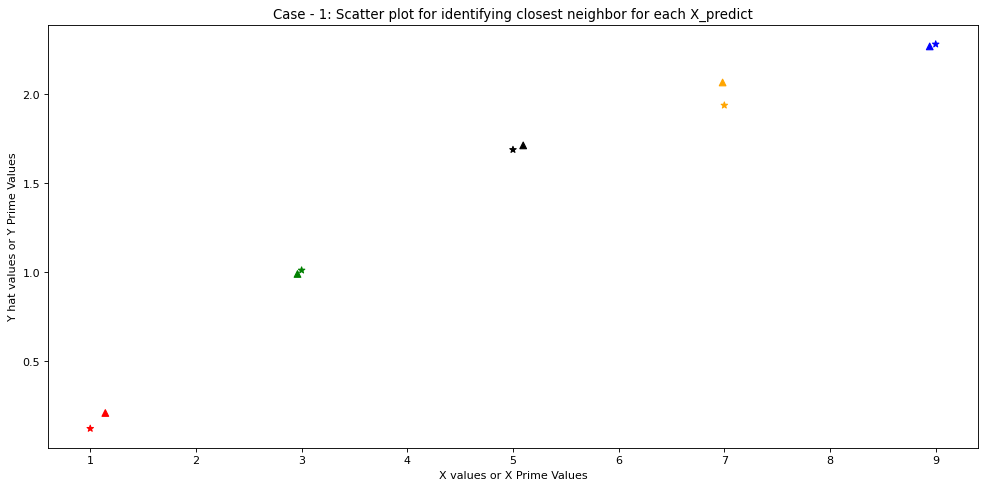

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 1: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

##### K = 3

In [99]:
uniform_k_3_nn_reg_model_class = KNeighborsRegressor(n_neighbors=3, weights='uniform')

In [100]:
uniform_k_3_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=3)

In [101]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [uniform_k_3_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 0.12370091070589033)
(3, 1.0111888812334178)
(5, 1.6869875140127155)
(7, 1.9358189752658455)
(9, 2.278424161343434)


In [106]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = uniform_k_3_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)
    
    

Extracting closest neightbor for x= 1 , y_hat= 0.12370091070589033
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.0111888812334178
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.6869875140127155
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9358189752658455
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.278424161343434
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


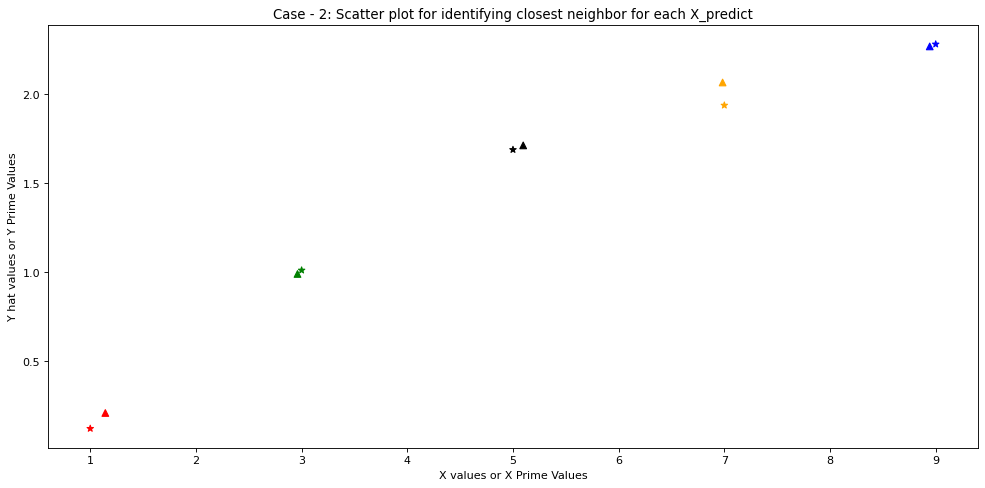

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 2: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

##### K = 50

In [109]:
uniform_k_50_nn_reg_model_class = KNeighborsRegressor(n_neighbors=50, weights='uniform')

In [110]:
uniform_k_50_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=50)

In [111]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [uniform_k_50_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 1.058126243213993)
(3, 1.058126243213993)
(5, 1.5729968508327543)
(7, 1.9427135910041884)
(9, 2.047947983008306)


In [112]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = uniform_k_50_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)
    
    

Extracting closest neightbor for x= 1 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.5729968508327543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9427135910041884
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.047947983008306
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


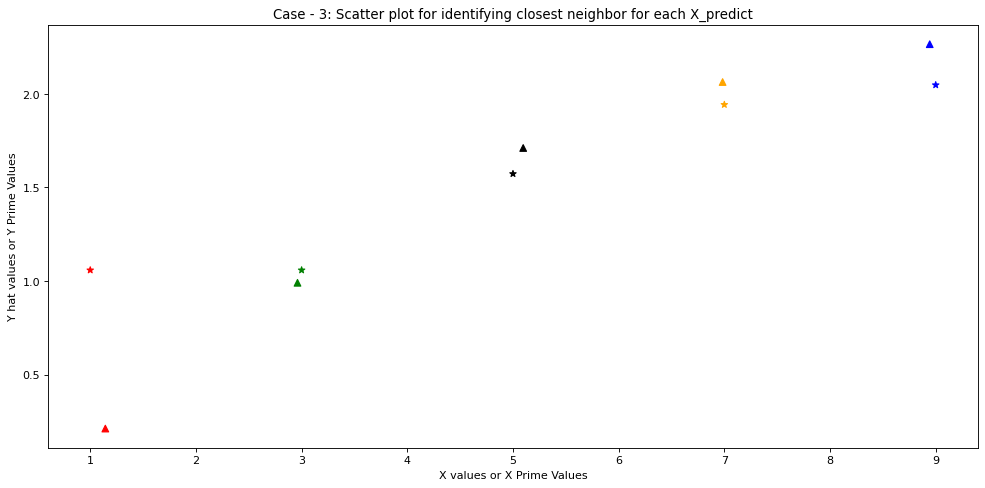

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 3: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

##### schema 2 : each of the K neighbors has an influence that is inversely proportional to the distance from the point (separately for K = 1, 3, 50

### K = 1

In [116]:
distance_k_1_nn_reg_model_class = KNeighborsRegressor(n_neighbors=1, weights='distance')
distance_k_1_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=1, weights='distance')

In [117]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [distance_k_1_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 0.21099533446746474)
(3, 0.9903923290546297)
(5, 1.7111162305585266)
(7, 2.063749325684543)
(9, 2.2660083110429)


In [118]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = distance_k_1_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)

Extracting closest neightbor for x= 1 , y_hat= 0.21099533446746474
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.9903923290546297
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.7111162305585266
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 2.063749325684543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.2660083110429
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


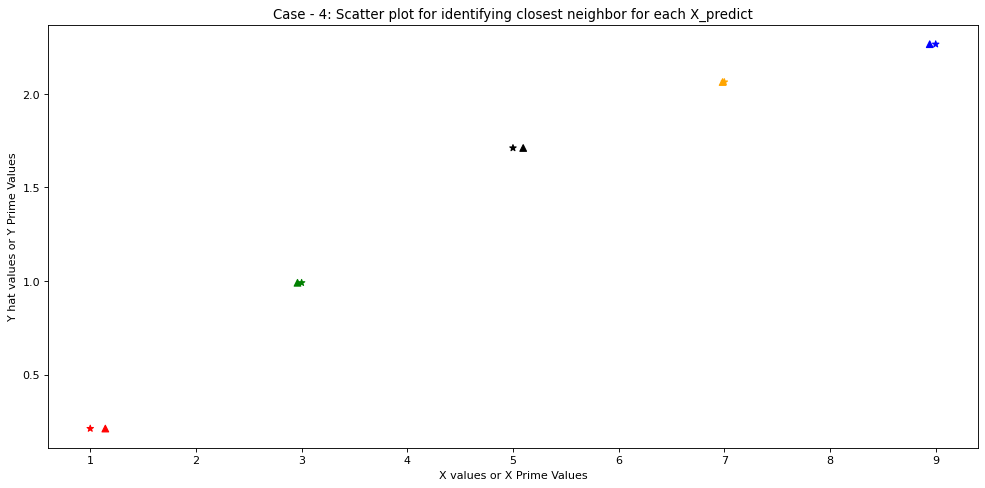

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 4: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

### K = 3

In [128]:
distance_k_3_nn_reg_model_class = KNeighborsRegressor(n_neighbors=3, weights='distance')
distance_k_3_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [129]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [distance_k_3_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 0.11423709655068509)
(3, 0.9920378514401798)
(5, 1.6881741257329956)
(7, 2.0167158396375586)
(9, 2.277162115629105)


In [131]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = distance_k_3_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)

Extracting closest neightbor for x= 1 , y_hat= 0.11423709655068509
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.9920378514401798
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.6881741257329956
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 2.0167158396375586
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.277162115629105
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


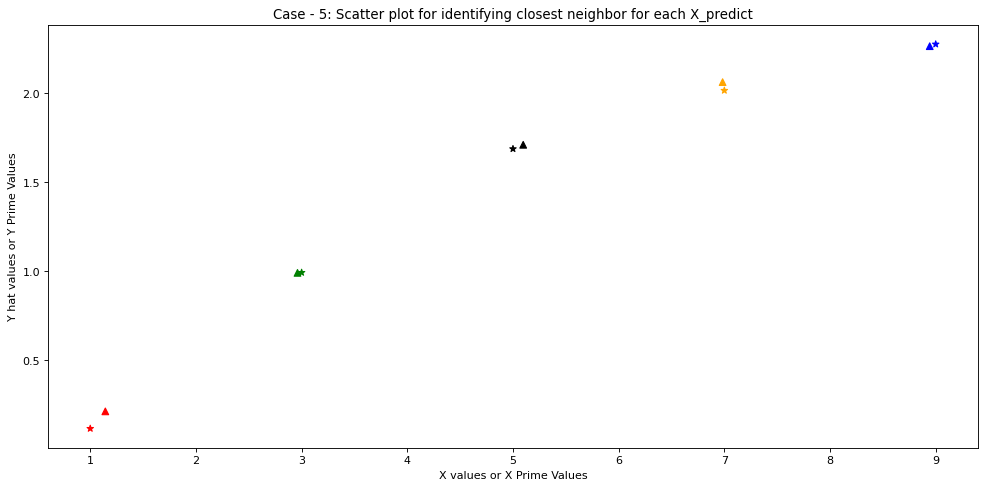

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 5: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

### K = 50

In [135]:
distance_k_50_nn_reg_model_class = KNeighborsRegressor(n_neighbors=50, weights='distance')
distance_k_50_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=50, weights='distance')

In [136]:
# Print the numerical values of the (x, yˆ) pairs 
y_predict = [distance_k_50_nn_reg_model_class.predict([[xi]]) for xi in x_predict]
predictions = []
for x_pred, y_pred in zip(x_predict, y_predict):
    # (x, y^)
    current_prediction = (x_pred, y_pred[0][0])
    print (current_prediction)
    predictions.append(current_prediction)

(1, 0.591368788075068)
(3, 1.0119467059818688)
(5, 1.6094655182608764)
(7, 1.9808828795930198)
(9, 2.2088085743426094)


In [137]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

x_values = []
y_hat_values = []
x_prime_values = []
y_prime_values = []


for x, y_hat in predictions:
    print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
    closes_neighbor_info = distance_k_50_nn_reg_model_class.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
    closes_neighbor_distance = closes_neighbor_info[0][0][0]
    closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
    # closest neighbor is x_prime and simaltenously y_prime
    x_prime = X[closes_neighbor_index_in_X]
    y_prime = y[closes_neighbor_index_in_X]
    print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
    # gather the below values for scatter plot
    x_values.append(x)
    y_hat_values.append(y_hat)
    x_prime_values.append(x_prime)
    y_prime_values.append(y_prime)

Extracting closest neightbor for x= 1 , y_hat= 0.591368788075068
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.0119467059818688
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.6094655182608764
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9808828795930198
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.2088085743426094
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (8.943504237368918, 2.2660083110429)


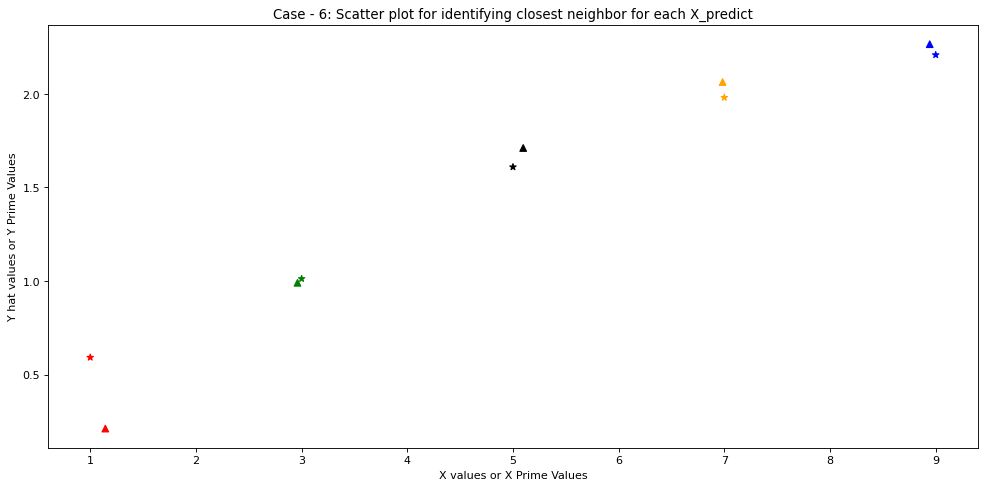

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue'])
plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
plt.xlabel("X values or X Prime Values")
plt.ylabel("Y hat values or Y Prime Values")
plt.title("Case - 6: Scatter plot for identifying closest neighbor for each X_predict")
plt.show()

##### schema 3 : all the N points contribute, with each contribution proportional to e−12d2, where d represents distance.

In [76]:
##TODO